11501568/11490434 [==============================] - 0s 0us/step


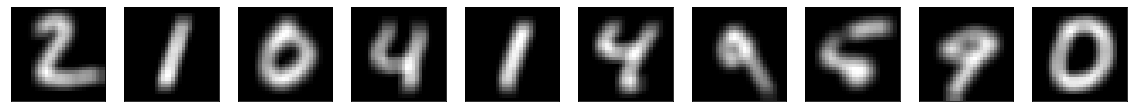

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import cv2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
#x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_blur = []
for x in x_train:
  x_train_blur.append(cv2.GaussianBlur(x,(5,5),cv2.BORDER_DEFAULT))
x_test_blur = []
for x in x_test:
  x_test_blur.append(cv2.GaussianBlur(x,(5,5),cv2.BORDER_DEFAULT))

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_blur[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# dis_net

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 32)        0         
                                                        

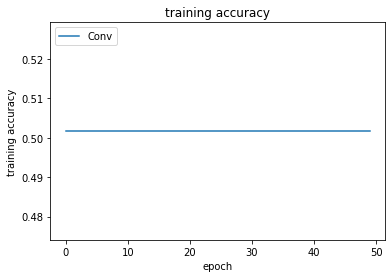

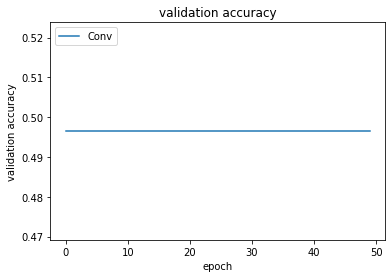

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

X_blur_train = np.append(x_train, x_train_blur, axis=0)
X_blur_test = np.append(x_test, x_test_blur, axis=0)
y_blur_train = np.array(([0] * 60000) + ([1] * 60000))
y_blur_test = np.array(([0] * 10000) + ([1] * 10000))

X_blur_train = np.reshape(X_blur_train, (len(X_blur_train), 28, 28, 1))
X_blur_test = np.reshape(X_blur_test, (len(X_blur_test), 28, 28, 1))

train_X, val_X, train_y, val_y = train_test_split(X_blur_train, y_blur_train, test_size = 0.33, random_state = 42)

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))


# Compile the model before using it
model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])
print(model.summary())

# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

history = model.fit(train_X, train_y,
                    batch_size=32,
                    epochs=50,
                    validation_data=(val_X, val_y),
                    shuffle=True,
                    callbacks=[save_best_model])

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
predictions = saved_model.predict(X_blur_test)
print(classification_report(y_blur_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.50      1.00      0.67     10000

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Latent Dimension = 2


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 2)                 244902    
                                                                 
 decoder (Functional)        (None, 784)               245684    
                                                                 
Total params: 490,586
Trainable params: 490,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
157/158 [============================>.] - ETA: 0s - loss: 0.1682
Epoch 00001: val_loss improved from inf to 0.12531, saving model to best_model.h5
158/158 [==============================] - 7s 44ms/step - loss: 0.1682 - val_loss: 0.1253
Epoch 2/50
157/158 [============================>.] - ETA: 0s - 

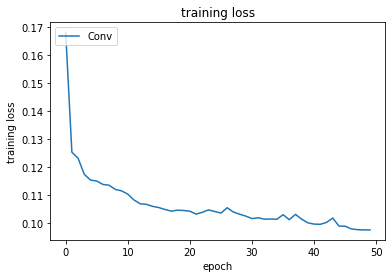

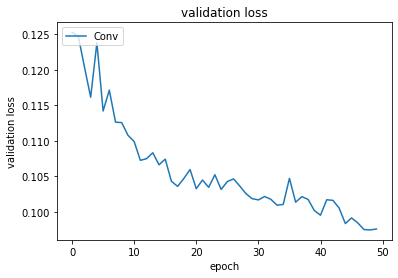

In [ ]:
import keras
from keras import layers
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint, EarlyStopping

x_train_blur = np.array(x_train_blur)
x_test_blur = np.array(x_test_blur)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_blur = x_train_blur.reshape((len(x_train_blur), np.prod(x_train_blur.shape[1:])))
x_test_blur = x_test_blur.reshape((len(x_test_blur), np.prod(x_test_blur.shape[1:])))

train_X, val_X, train_y, val_y = train_test_split(x_train_blur, x_train, test_size = 0.33, random_state = 42)

def my_loss(y_pred, y_true):
  mae = keras.losses.MeanAbsoluteError()
  l1 = mae(y_true, y_pred)
  y_blur = []
  for y in y_true:
    y = y.numpy().reshape(28, 28)
    tmp = cv2.GaussianBlur(y,(5,5), cv2.BORDER_DEFAULT)
    tmp.reshape(np.prod(tmp.shape))
    y_blur.append(tmp)
  dl = mae(y_blur, y_pred)
  return l1 + dl

latent_dim = 2

# Create encoder
input_img = keras.Input(shape=(784,), name="input_img")
x = layers.Dense(256, activation='relu')(input_img)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
encoded  = layers.Dense(latent_dim, activation='relu')(x)
encoder = keras.Model(input_img, encoded, name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='latent_input')
x = layers.Dense(4, activation='relu')(latent_inputs)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
decoded = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, decoded, name='decoder')

# antoencoder model
net = decoder(encoder(input_img))
autoencoder = keras.Model(input_img, net, name='autoencoder')
autoencoder.compile(optimizer='adam', loss="mean_absolute_error", run_eagerly=True)
autoencoder.summary()

best_model = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', save_best_only=True, verbose=1)

history = autoencoder.fit(train_X, train_y,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_X, val_y),
                          callbacks=[best_model])

# Plot training accuracy
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

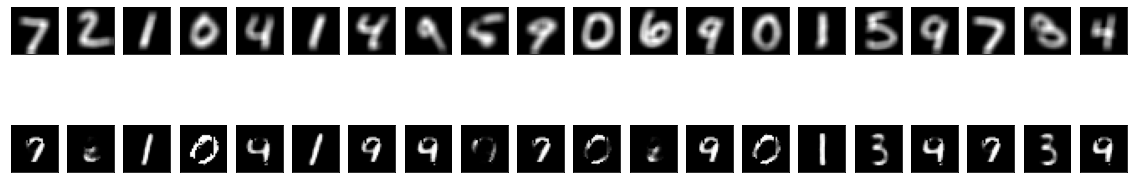

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test_blur)
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_blur[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

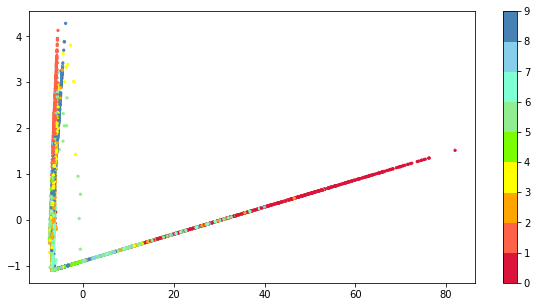

In [ ]:
from matplotlib.colors import ListedColormap
import pandas as pd


pca = PCA(n_components=2)

colours = ListedColormap(["crimson", "tomato", "orange", "yellow", "lawngreen", "lightgreen", "aquamarine", "skyblue", "steelblue"])

x_test_encoded = encoder.predict(x_test, batch_size=256)

principalComponents = pca.fit_transform(x_test_encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

plt.figure(figsize=(10, 5))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=y_test, cmap=colours, s=5)
plt.colorbar()
plt.show()

In [ ]:
decoded_imgs = np.reshape(decoded_imgs, (len(decoded_imgs), 28, 28, 1))

predictions = saved_model.predict(decoded_imgs).flatten().tolist()

clear = 0
for p in predictions:
  if p == 1:
    clear += 1 

print(clear / len(predictions))

1.0


# Latent Dimension = 16


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 16)                244720    
                                                                 
 decoder (Functional)        (None, 784)               245488    
                                                                 
Total params: 490,208
Trainable params: 490,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
155/158 [============================>.] - ETA: 0s - loss: 0.1552
Epoch 00001: val_loss improved from inf to 0.12713, saving model to best_model.h5
158/158 [==============================] - 2s 7ms/step - loss: 0.1549 - val_loss: 0.1271
Epoch 2/200
154/158 [============================>.] - ETA: 0s -

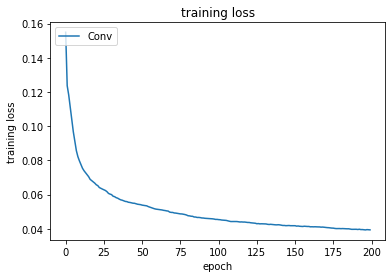

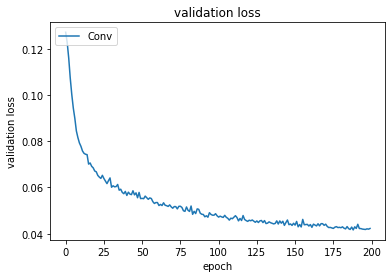

In [ ]:
latent_dim = 16

# Create encoder
input_img = keras.Input(shape=(784,), name="input_img")
x = layers.Dense(256, activation='relu')(input_img)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
encoded  = layers.Dense(latent_dim, activation='relu')(x)
encoder = keras.Model(input_img, encoded, name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='latent_input')
x = layers.Dense(32, activation='relu')(latent_inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
decoded = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, decoded, name='decoder')

# antoencoder model
net = decoder(encoder(input_img))
autoencoder = keras.Model(input_img, net, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
autoencoder.summary()

best_model = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', save_best_only=True, verbose=1)

history = autoencoder.fit(train_X, train_y,
                          epochs=200,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_X, val_y),
                          callbacks=[best_model])

# Plot training accuracy
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

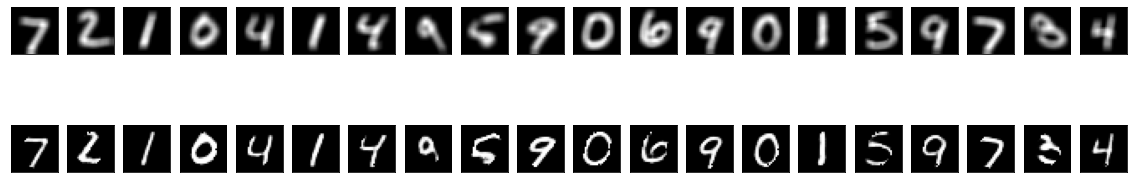

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test_blur)
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_blur[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs = np.reshape(decoded_imgs, (len(decoded_imgs), 28, 28, 1))

predictions = saved_model.predict(decoded_imgs).flatten().tolist()

clear = 0
for p in predictions:
  if p == 1:
    clear += 1 

print(clear / len(predictions))

1.0


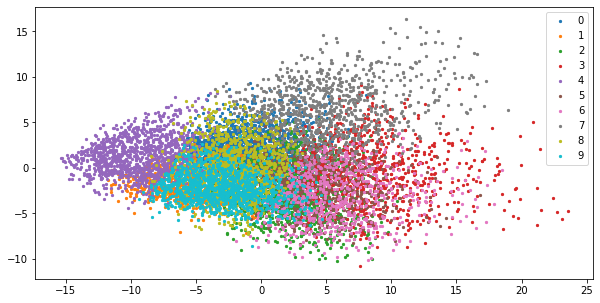

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


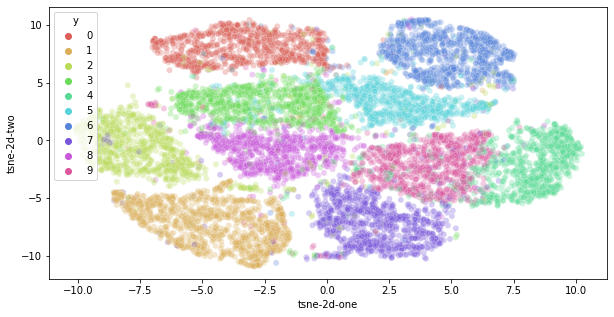

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

x_train_encoded = encoder.predict(x_train_blur, batch_size=256)
x_test_encoded = encoder.predict(x_test_blur, batch_size=256)
kmeans = KMeans(n_clusters=10, random_state=42).fit(x_train_encoded)
y_pred = kmeans.predict(x_test_encoded)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_test_encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['label'] = y_pred

plt.figure(figsize=(10, 5))
for i in range(10):
  tmp = principalDf[principalDf['label'] == i]
  plt.scatter(tmp['principal component 1'], tmp['principal component 2'], label = i, s = 5)
plt.legend()
plt.show()

df = pd.DataFrame(x_test_encoded)
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

dt_sub = pd.DataFrame(zip(tsne_results[:,0], tsne_results[:,1], y_test), 
                      columns=["tsne-2d-one", "tsne-2d-two", "y"]) 
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=dt_sub,
    legend="full",
    alpha=0.3
)

# Latent Dimension = 256


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 256)               200960    
                                                                 
 decoder (Functional)        (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
146/158 [==========================>...] - ETA: 0s - loss: 0.1401
Epoch 00001: val_loss improved from inf to 0.10503, saving model to best_model.h5
158/158 [==============================] - 1s 7ms/step - loss: 0.1377 - val_loss: 0.1050
Epoch 2/200
145/158 [==========================>...] - ETA: 0s -

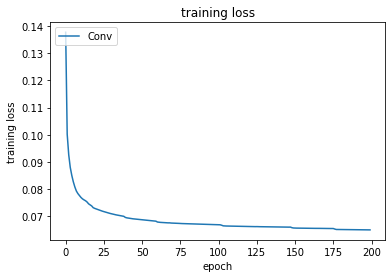

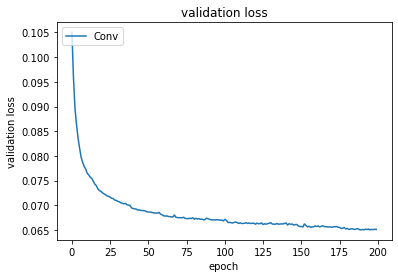

In [ ]:
latent_dim = 256

# Create encoder
input_img = keras.Input(shape=(784,), name="input_img")
encoded = layers.Dense(latent_dim, activation='relu')(input_img)
encoder = keras.Model(input_img, encoded, name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='latent_input')
decoded = layers.Dense(784, activation='sigmoid')(latent_inputs)
decoder = keras.Model(latent_inputs, decoded, name='decoder')

# antoencoder model
net = decoder(encoder(input_img))
autoencoder = keras.Model(input_img, net, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
autoencoder.summary()

best_model = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', save_best_only=True, verbose=1)

history = autoencoder.fit(train_X, train_y,
                          epochs=200,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_X, val_y),
                          callbacks=[best_model])

# Plot training accuracy
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

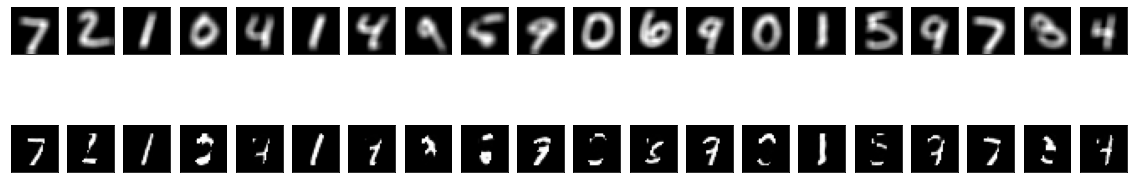

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test_blur)
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_blur[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs = np.reshape(decoded_imgs, (len(decoded_imgs), 28, 28, 1))

predictions = saved_model.predict(decoded_imgs).flatten().tolist()

clear = 0
for p in predictions:
  if p == 1:
    clear += 1 

print(clear / len(predictions))

1.0


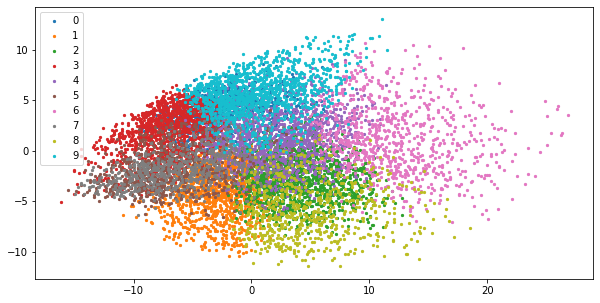

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


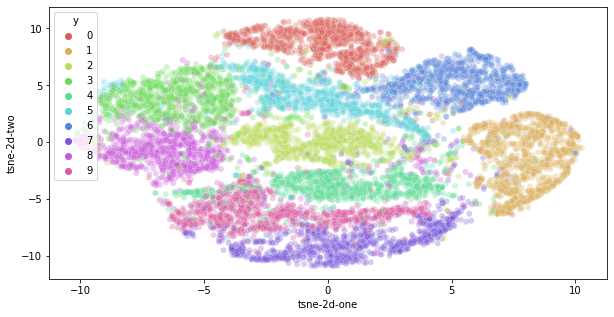

In [ ]:
x_train_encoded = encoder.predict(x_train_blur, batch_size=256)
x_test_encoded = encoder.predict(x_test_blur, batch_size=256)
kmeans = KMeans(n_clusters=10, random_state=42).fit(x_train_encoded)
y_pred = kmeans.predict(x_test_encoded)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_test_encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['label'] = y_pred

plt.figure(figsize=(10, 5))
for i in range(10):
  tmp = principalDf[principalDf['label'] == i]
  plt.scatter(tmp['principal component 1'], tmp['principal component 2'], label = i, s = 5)
plt.legend()
plt.show()

df = pd.DataFrame(x_test_encoded)
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

dt_sub = pd.DataFrame(zip(tsne_results[:,0], tsne_results[:,1], y_test), 
                      columns=["tsne-2d-one", "tsne-2d-two", "y"]) 
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=dt_sub,
    legend="full",
    alpha=0.3
)